# Example Data Notebook for TAQ Database


In [1]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
! pip install fabric

In [2]:
from scripts.query_helpers import client_connection
from scripts.preprocess import clean_trades,clean_quotes
import pandas as pd
import numpy as np
from datetime import datetime
import collections
from itertools import chain
import matplotlib.pyplot as plt

### Personal Details

Below are the details needed to authenticate into the server and crete a client connection

In [5]:
host="ppolak5.ams.stonybrook.edu."
server_user= 'TEMP'
server_password='TEMP'
db_user='TEMP'
db_pass='TEMP'

In [6]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Example Trade Query

In [5]:
exchange="N" #nasdaq 
symbol='AAPL'
start= "2020-01-01"
end="2020-01-30"


In [6]:
result=conn.client_get_trades(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)


Trade Query for N AAPL 2020-01-01 2020-01-30


INFO:paramiko.transport:Authentication (password) successful!
/home/jbohne/.conda/envs/query_user/lib/python3.10/site-packages/clickhouse_sqlalchemy/drivers/base.py:268: SAWarning: Did not recognize type 'DateTime64(9, 'America/New_York')' of column 'Time'
  warn("Did not recognize type '%s' of column '%s'" %
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


In [7]:
trades=pd.read_csv('data/AAPL_trades.csv')
trades=clean_trades(trades)
trades.to_csv('data/AAPL_trades.csv')
trades

,Time,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,date
2020-01-02 09:30:00.624116,2020-01-02 09:30:00.624116,N,AAPL,50,296.23,@ I,N,2020-01-02
2020-01-02 09:30:00.836409,2020-01-02 09:30:00.836409,N,AAPL,22,296.25,@ I,N,2020-01-02
2020-01-02 09:30:01.073828,2020-01-02 09:30:01.073828,N,AAPL,31,296.26,@ I,N,2020-01-02
2020-01-02 09:30:01.261512,2020-01-02 09:30:01.261512,N,AAPL,3,296.27,@ I,N,2020-01-02
2020-01-02 09:30:01.294279,2020-01-02 09:30:01.294279,N,AAPL,31,296.25,@ I,N,2020-01-02
...,...,...,...,...,...,...,...,...
2020-01-29 15:59:53.741022,2020-01-29 15:59:53.741022,N,AAPL,200,324.19,@,N,2020-01-29
2020-01-29 15:59:54.202375,2020-01-29 15:59:54.202375,N,AAPL,7,324.20,@F I,N,2020-01-29
2020-01-29 15:59:54.211587,2020-01-29 15:59:54.211587,N,AAPL,18,324.15,@F I,N,2020-01-29
2020-01-29 15:59:55.697308,2020-01-29 15:59:55.697308,N,AAPL,3,324.26,@ I,N,2020-01-29


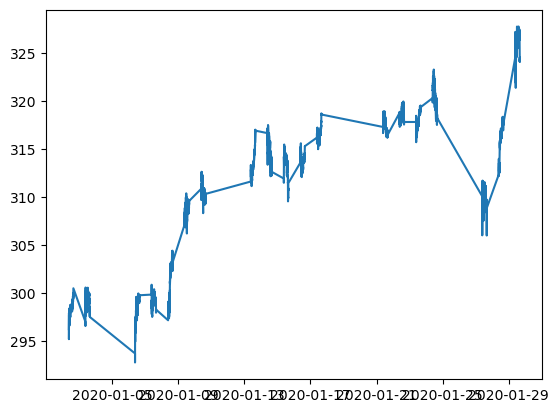

In [8]:
plt.plot(trades['Trade_Price'])

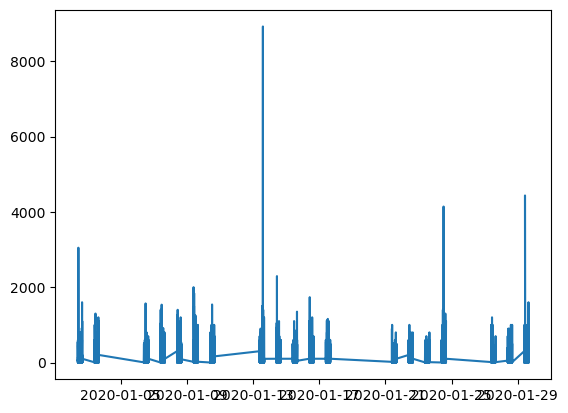

In [9]:
plt.plot(trades['Trade_Volume'])

### Example Quote Query

In [11]:
exchange="N"
symbol='AAPL'
start= "2020-01-15"
end="2020-01-30"


In [12]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

In [13]:
result=conn.client_get_quotes(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)


Quote Query for N AAPL 2020-01-15 2020-01-30


INFO:paramiko.transport:Authentication (password) successful!
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


In [3]:
quotes=pd.read_csv('data/AAPL_quotes1.csv')
quotes=clean_quotes(quotes)
quotes.to_csv('data/AAPL_quotes1.csv')

In [4]:
quotes

,Time,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,FINRA_BBO_Indicator,...,Best_Offer_Price,Best_Offer_Size,Best_Offer_FINRA_Market_Maker_ID,LULD_Indicator,LULD_NBBO_Indicator,SIP_Generated_Message_Identifier,Participant_Timestamp,FINRA_ADF_Timestamp,Security_Status_Indicator,date
2020-01-02 09:30:03.297207,2020-01-02 09:30:03.297207,N,AAPL,295.70,1.0,296.75,6.0,R,288805,NaN,...,296.26,2.0,NaN,NaN,A,NaN,93003296828928,NaN,,2020-01-02
2020-01-02 09:30:05.489581,2020-01-02 09:30:05.489581,N,AAPL,296.14,4.0,296.75,5.0,R,296557,NaN,...,296.19,4.0,NaN,NaN,A,NaN,93005489204736,NaN,,2020-01-02
2020-01-02 09:30:05.664062,2020-01-02 09:30:05.664062,N,AAPL,295.70,1.0,296.75,5.0,R,297100,NaN,...,296.16,2.0,NaN,NaN,A,NaN,93005663684096,NaN,,2020-01-02
2020-01-02 09:30:06.279237,2020-01-02 09:30:06.279237,N,AAPL,294.05,1.0,296.12,2.0,R,299138,NaN,...,296.07,4.0,NaN,NaN,A,NaN,93006278858496,NaN,,2020-01-02
2020-01-02 09:30:14.711372,2020-01-02 09:30:14.711372,N,AAPL,295.12,1.0,295.74,1.0,R,318631,NaN,...,295.74,1.0,NaN,NaN,A,NaN,93014710996992,NaN,,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-14 15:59:59.828893,2020-01-14 15:59:59.828893,N,AAPL,312.36,1.0,312.70,1.0,R,35703233,NaN,...,312.70,1.0,NaN,NaN,A,NaN,155959828515840,NaN,,2020-01-14
2020-01-14 15:59:59.838214,2020-01-14 15:59:59.838214,N,AAPL,312.36,1.0,312.61,1.0,R,35703456,NaN,...,312.61,1.0,NaN,NaN,A,NaN,155959837836032,NaN,,2020-01-14
2020-01-14 15:59:59.839247,2020-01-14 15:59:59.839247,N,AAPL,312.36,1.0,312.86,1.0,R,35703471,NaN,...,312.61,1.0,NaN,NaN,A,NaN,155959838867712,NaN,,2020-01-14
2020-01-14 15:59:59.900211,2020-01-14 15:59:59.900211,N,AAPL,312.63,1.0,312.86,1.0,R,35704125,NaN,...,312.71,1.0,NaN,NaN,A,NaN,155959899830784,NaN,,2020-01-14


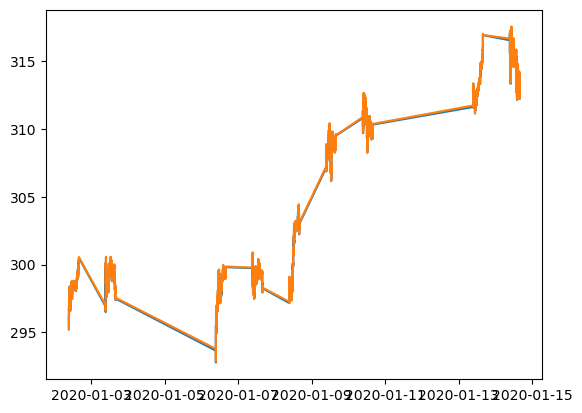

In [5]:
plt.plot(quotes['Best_Bid_Price'],label='Bid')
plt.plot(quotes['Best_Offer_Price'],label='Offer' )

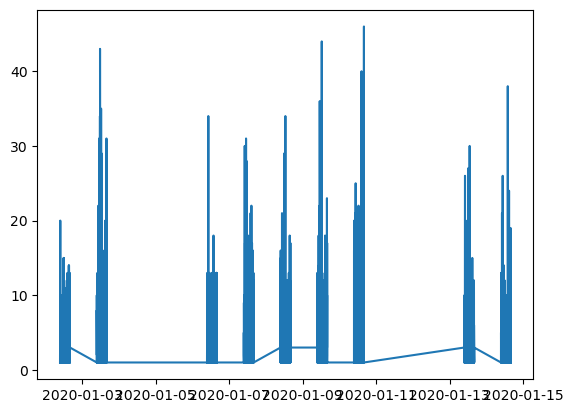

In [6]:
plt.plot(quotes['Bid_Size'],label='Bid Size')
